# Assignment 4 Matteo Breganni 869549

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

plt.rcParams['figure.figsize'] = [15,5] # width, height

In [ ]:
# Images import
im1 = cv.imread('boat1.jpg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('boat3.jpg', cv.IMREAD_GRAYSCALE)

In [ ]:
# Computes the keypoints and the descriotors for both images
sift = cv.SIFT_create()
(kps1, features1)  = sift.detectAndCompute(im1, None)
(kps2, features2)  = sift.detectAndCompute(im2, None)

In [ ]:
print(len(kps1))
print(len(kps2))

1193
850


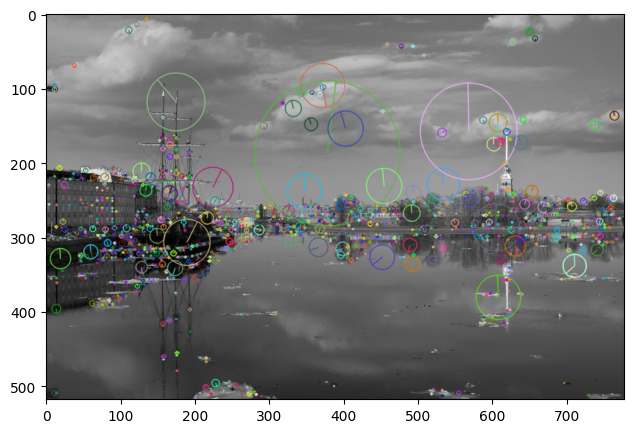

In [ ]:
# Show the keypoints on im1 with orientations and sizes
plt.imshow(cv.drawKeypoints(im1, kps1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

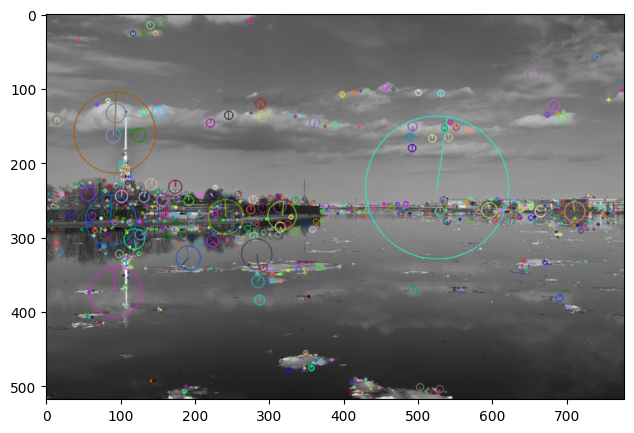

In [ ]:
# Show the keypoints on im2 with orientations and sizes
plt.imshow(cv.drawKeypoints(im2, kps2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [ ]:
# Calculates the matches between the descriptors of im1 and im2
bf = cv.BFMatcher.create(crossCheck=True)
matches = bf.match(features1, features2)

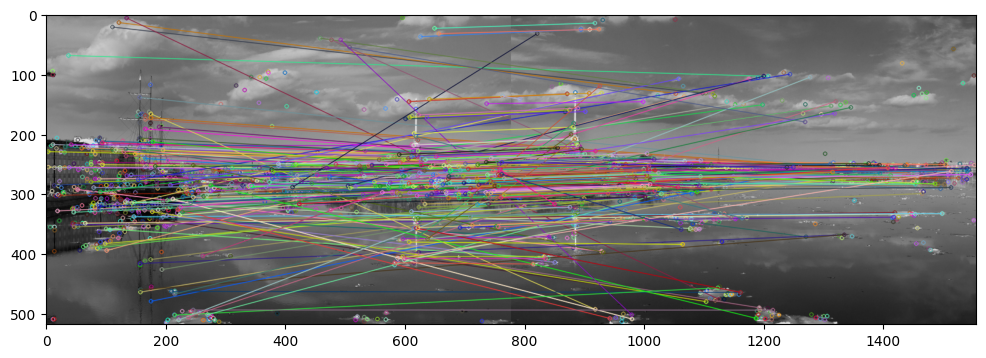

In [ ]:
# Display the matches
plt.figure(figsize=(12, 8))

plt.imshow(cv.drawMatches(im1, kps1, im2, kps2, matches, None))
plt.show()

In [ ]:
len(matches)

379

In [ ]:
# Just for the presentation of the results, let's see how the top 50 matches look.
sorted_matches = sorted(matches, key=lambda x:x.distance)[0:50]

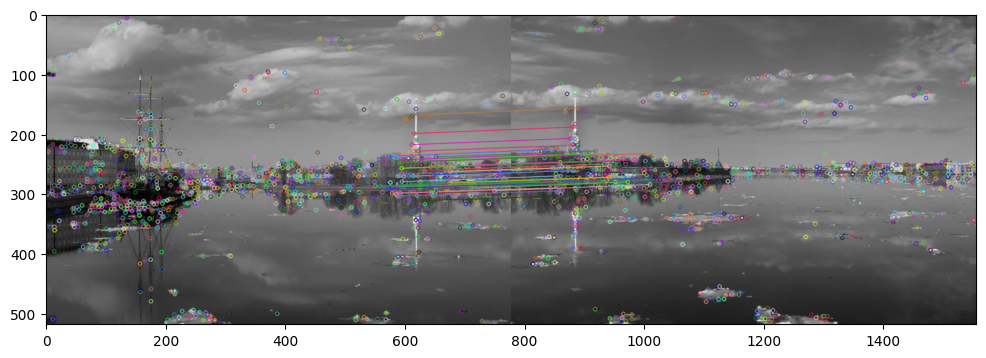

In [ ]:
# Display the top 50 matches
plt.figure(figsize=(12, 8))

plt.imshow(cv.drawMatches(im1, kps1, im2, kps2, sorted_matches, None))
plt.show()

This was just to have an idea of how well the matching worked. From the top 50 matches we can see that the mathes seem quite good. I will use the original entire set of matches from now on (as requested).

In [ ]:
# Finds the homography which describes the transformation from the second set of points to the first one
def myHomography(kps1, kps2, matches):
  # Extract corresponding points from the keypoints and matches
  src_kps = np.float32([kps1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2) # queryIdx is the index of the keypoint in kps1 that matches with a keypoint in kps2
  dst_kps = np.float32([kps2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2) # trainIdx is the index of the corresponding keypoint in kps2
  # so this loops through all the matches. The result is converted to a numpy array of floats (because findHomography() requires it)
  # and reshapes the array in the correct way that findHomography() requires

  # Uses RANSAC to estimate the homography matrix
  H, mask = cv.findHomography(dst_kps, src_kps, cv.RANSAC) # From the second set to to the first
  return H

In [ ]:
# Calculates the homography from the second image to the first image
H = myHomography(kps1, kps2, matches)
print(H)

[[ 5.69534898e-01 -3.24168884e-03  5.20536833e+02]
 [-1.53429459e-01  9.22489310e-01  2.95572137e+01]
 [-5.53445930e-04 -9.11697723e-06  1.00000000e+00]]


In [ ]:
# Applies a perspective transformation to an input image using a homography matrix.
def myWarp(im, H):
  h, w = im.shape # Get the height and width of the input image

  # Apply perspective transformation using OpenCV's warpPerspective
  warped_image = cv.warpPerspective(im, H, (w*2, h)) # passing the image, the homography matrix and the output image size (I made it wider to not cut off the image too much)

  return warped_image

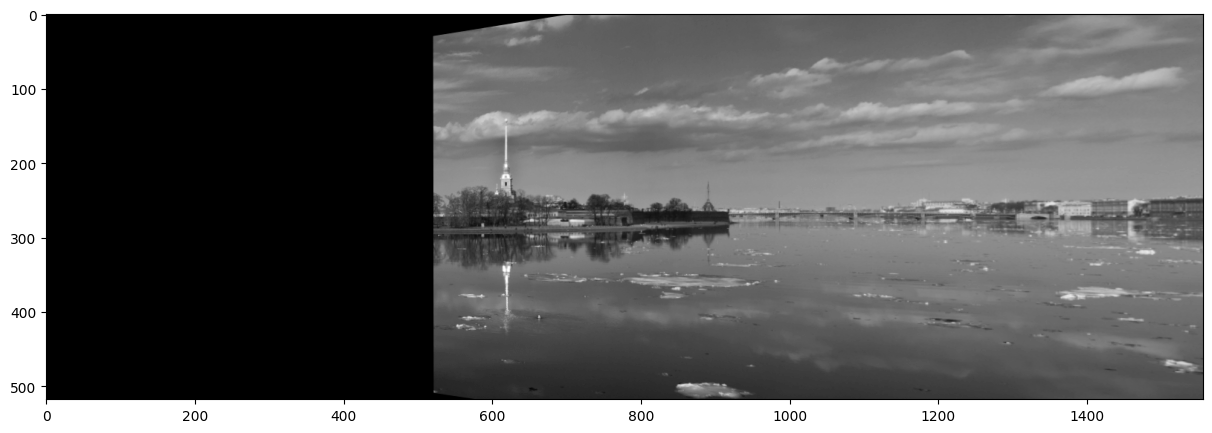

In [ ]:
# Apply a perspective warp to the second image
temp = myWarp(im2, H)

plt.imshow(temp, cmap='gray'); plt.show()

In [ ]:
def myCollage(im_base, im_new):
    collaged_image = im_base.copy() # Copies the warped image into the collage

    h_new, w_new = im_new.shape # Gets size of im1 (original image)

    collaged_image[0:h_new, 0:w_new] = im_new # Pastes im1 into the left side of the collage

    return collaged_image

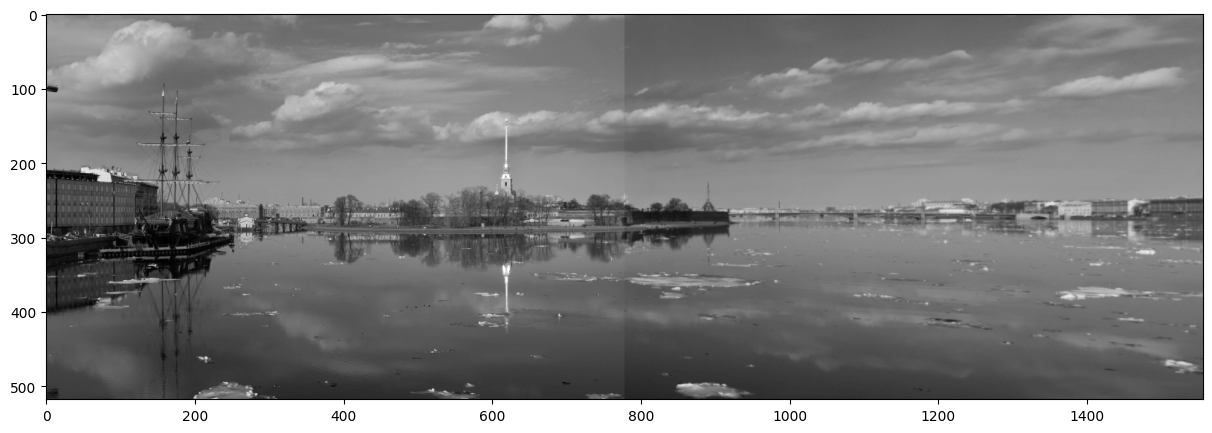

In [ ]:
result = myCollage(temp, im1) # calculates the collage between the first image and the warped second image
plt.imshow(result, cmap='gray'); plt.show()

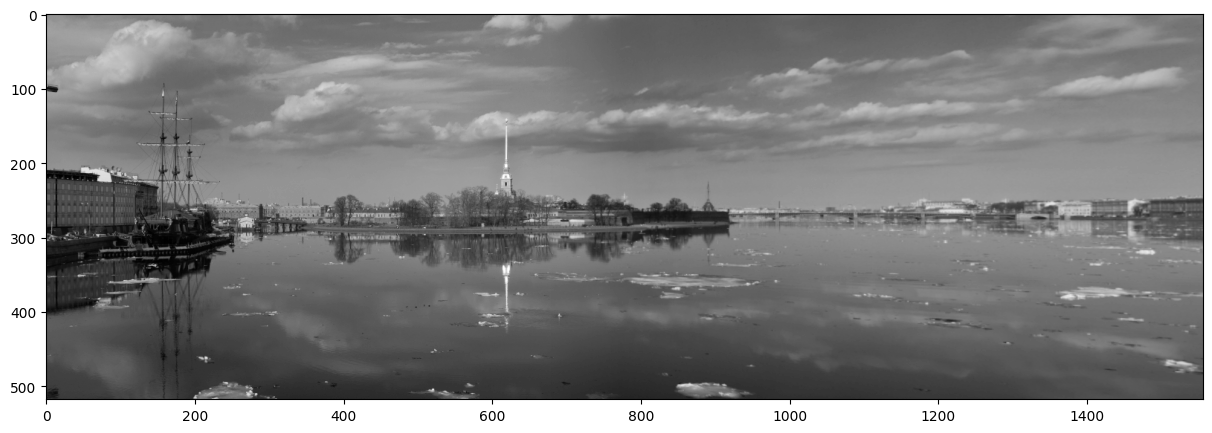

In [ ]:
# (extra) Creates a gradient blend between the images

_, im1_width = im1.shape # Gets im1 width

blend_width = 100  # Width of the blending region
h, w = result.shape # Gets size of the collage

# Create a gradient mask
gradient = np.zeros((h, w)) # Initializes the gradient to zeros
for i in range(blend_width): # For each column of the gradient matrix, until the end of the gradient width
    alpha = i / blend_width # Calculates the alpha value to blend the two images
    gradient[:, im1_width - blend_width + i] = alpha # Fill the column with the gradient value (alpha)

# Blend the images
blended = result.copy()
blended[:, im1_width-blend_width:im1_width] = (
    (1 - gradient[:, im1_width-blend_width:im1_width]) * im1[:, im1_width-blend_width:im1_width] +
    gradient[:, im1_width-blend_width:im1_width] * temp[:, im1_width-blend_width:im1_width]
)

# Display the blended collage
plt.imshow(blended, cmap='gray')
plt.show()

In [ ]:
# Now, in this section, I have just copy-pasted some of the code above to make a college of 2 custom pictures I took.
im1 = cv.imread('img1.jpg', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('img2.jpg', cv.IMREAD_GRAYSCALE)

In [ ]:
(kps1, features1)  = sift.detectAndCompute(im1, None)
(kps2, features2)  = sift.detectAndCompute(im2, None)
print(len(kps1))
print(len(kps2))

7107
7671


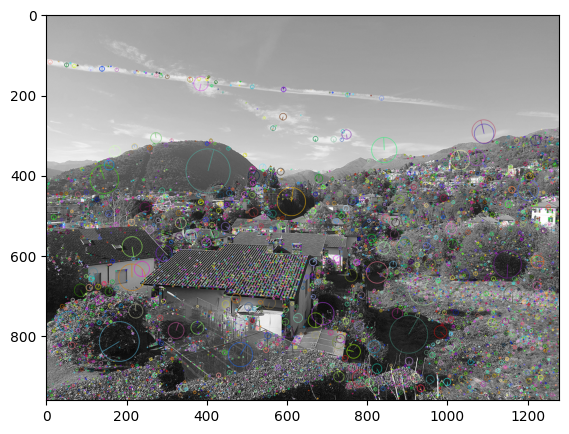

In [ ]:
plt.imshow(cv.drawKeypoints(im1, kps1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

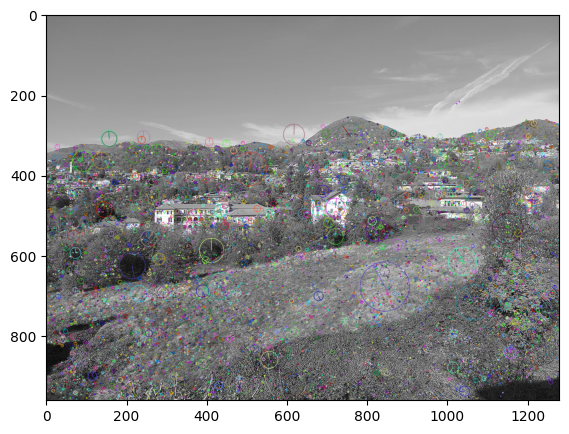

In [ ]:
plt.imshow(cv.drawKeypoints(im2, kps2, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [ ]:
bf = cv.BFMatcher.create(crossCheck=True)
matches = bf.match(features1, features2)
print(len(matches))

2441


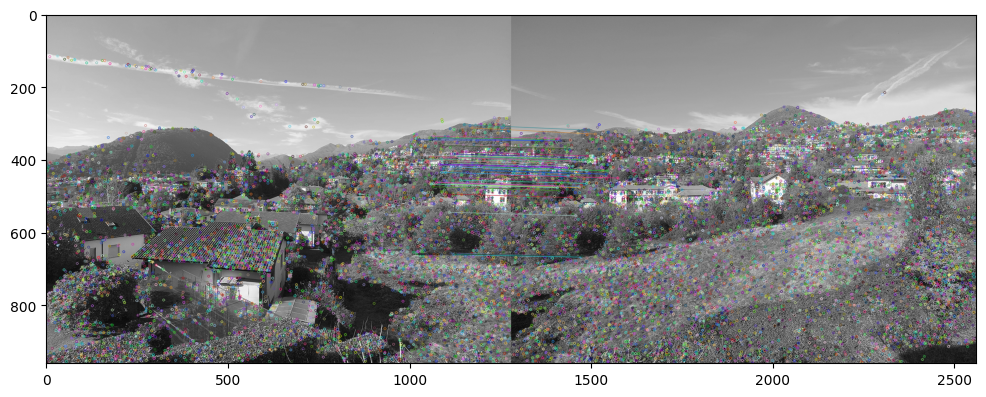

In [ ]:
sorted_matches = sorted(matches, key=lambda x:x.distance)[0:50]
plt.figure(figsize=(12, 8))

plt.imshow(cv.drawMatches(im1, kps1, im2, kps2, sorted_matches, None))
plt.show()

In [ ]:
H = myHomography(kps1, kps2, matches)
print(H)

[[ 1.21181021e-02  1.96279534e-02  9.55229025e+02]
 [-3.41343133e-01  8.83013655e-01  4.69185354e+01]
 [-7.78647750e-04  1.98013449e-05  1.00000000e+00]]


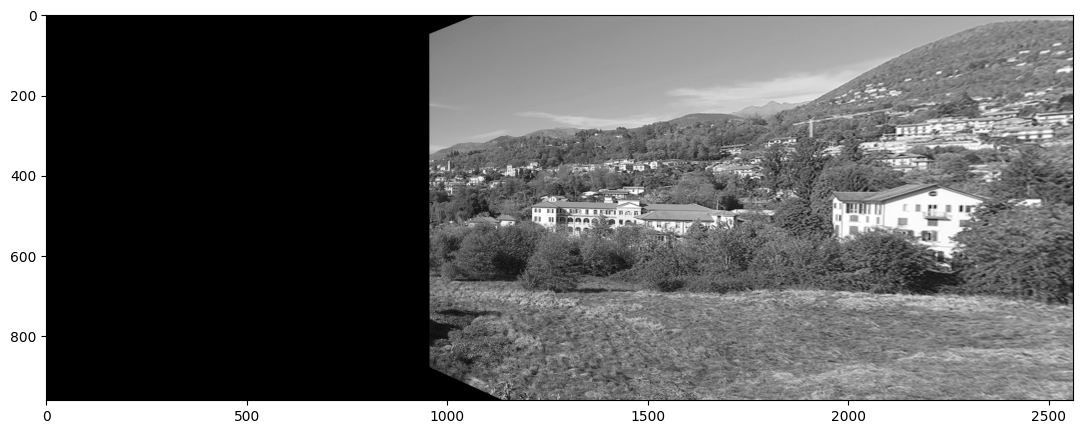

In [ ]:
temp = myWarp(im2, H)

plt.imshow(temp, cmap='gray'); plt.show()

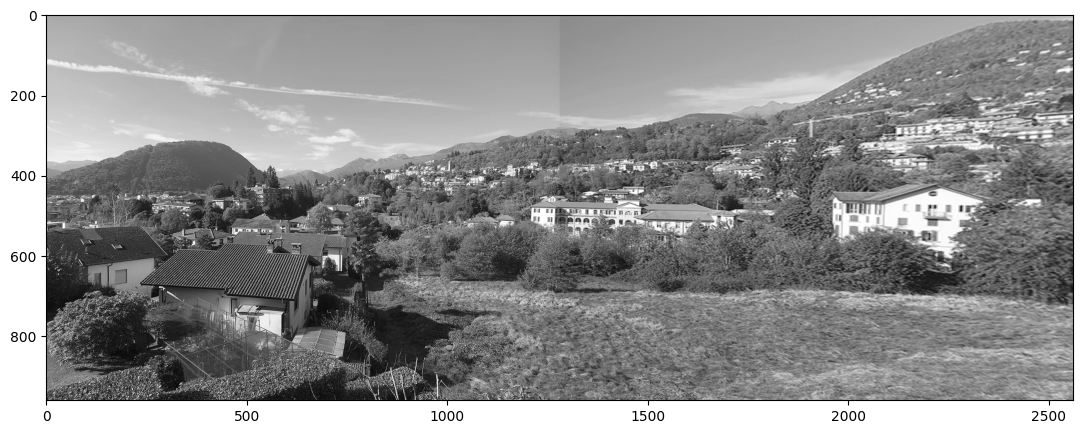

In [ ]:
result = myCollage(temp, im1) # calculates the collage between the first image and the warped second image
plt.imshow(result, cmap='gray'); plt.show()

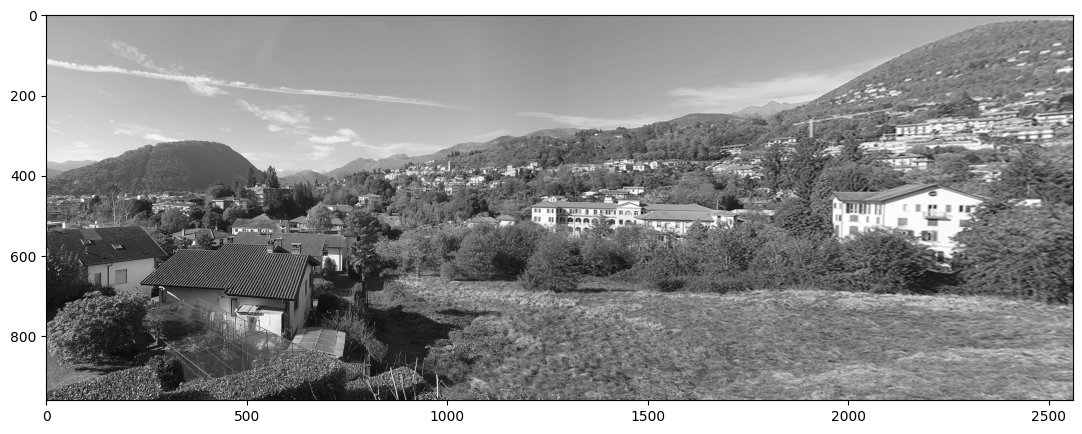

In [ ]:
# (extra) Creates a gradient blend between the images

_, im1_width = im1.shape # Gets im1 width

blend_width = 200  # Width of the blending region
h, w = result.shape # Gets size of the collage

# Create a gradient mask
gradient = np.zeros((h, w)) # Initializes the gradient to zeros
for i in range(blend_width): # For each column of the gradient matrix, until the end of the gradient width
    alpha = i / blend_width # Calculates the alpha value to blend the two images
    gradient[:, im1_width - blend_width + i] = alpha # Fill the column with the gradient value (alpha)

# Blend the images
blended = result.copy()
blended[:, im1_width-blend_width:im1_width] = (
    (1 - gradient[:, im1_width-blend_width:im1_width]) * im1[:, im1_width-blend_width:im1_width] +
    gradient[:, im1_width-blend_width:im1_width] * temp[:, im1_width-blend_width:im1_width]
)

# Display the blended collage
plt.imshow(blended, cmap='gray')
plt.show()